## Customer Service Requests Analysis

### Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

**Domain: Customer Service**



In [1]:
#importing require library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load datasets
df = pd.read_csv("NYC_311.csv")

In [3]:
#Check the shape of datasets
df.shape

(300698, 53)

In [4]:
#Check size of datasets
df.size

15936994

In [5]:
#To see max row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
type(df['Created Date'])

pandas.core.series.Series

In [7]:
#See first 5 rows
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [8]:
#Se datasets description
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [9]:
#Check the corelation of dataset
df.corr()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
Unique Key,1.000000,0.024840,-0.009176,-0.032238,NaN,NaN,NaN,NaN,NaN,-0.032243,-0.009180
Incident Zip,0.024840,1.000000,0.392038,-0.498235,NaN,NaN,NaN,NaN,NaN,-0.498488,0.391383
X Coordinate (State Plane),-0.009176,0.392038,1.000000,0.364517,NaN,NaN,NaN,NaN,NaN,0.364002,0.999999
Y Coordinate (State Plane),-0.032238,-0.498235,0.364517,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.365481
School or Citywide Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Company Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Pick Up Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Lot Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-0.032243,-0.498488,0.364002,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.364966


In [10]:
#To see the columns of datasets
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
#check the info of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [12]:
#check the null of datasets
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [13]:
#Remove useless columns form the data sets
remove_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [14]:
df.drop(remove_columns, inplace=True,axis=1 )
df = df[df['Status']=='Closed']
df.drop(['Status'],inplace=True, axis=1)
df = df[(df['Latitude'].notnull())& (df['Longitude'].notnull()) & (df['Descriptor'].notnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [15]:
#Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype
df['Created Date']= pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291204 non-null  int64         
 1   Created Date            291204 non-null  datetime64[ns]
 2   Closed Date             291204 non-null  datetime64[ns]
 3   Agency                  291204 non-null  object        
 4   Complaint Type          291204 non-null  object        
 5   Descriptor              291204 non-null  object        
 6   Location Type           291149 non-null  object        
 7   Incident Zip            291164 non-null  float64       
 8   City                    291164 non-null  object        
 9   Resolution Description  291204 non-null  object        
 10  Borough                 291204 non-null  object        
 11  Latitude                291204 non-null  float64       
 12  Longitude               291204

In [17]:
#Creating the new column 'Request_Closing_Time' in the data
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']

- Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
- As shown below, highest number of complaints are of 'Blocked Driveway' type, followed by 'Illegal Parking' and 'Noise - Street/Sidewalk'.

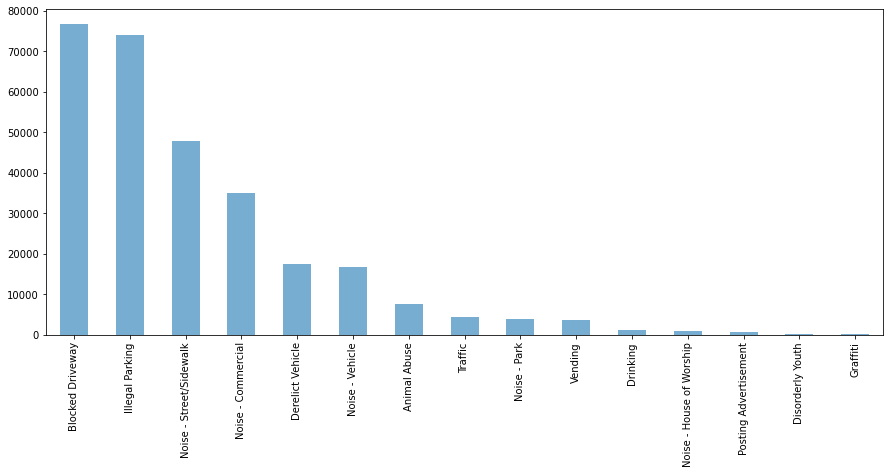

In [18]:
df['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,6))
plt.show()

- When we plot the complaints by 'Descriptor', it varifies our previous point.
- 'Blocked Driveway' has highest of 'No Access' complaints followed by 'Posted Parking Sign Violation' and 'Partial Access'. (No regards for Parking rules. )
- With respect to noise related complaints, 'Loud Music/Party' has the highest complaints, followed by 'Loud Talking'.

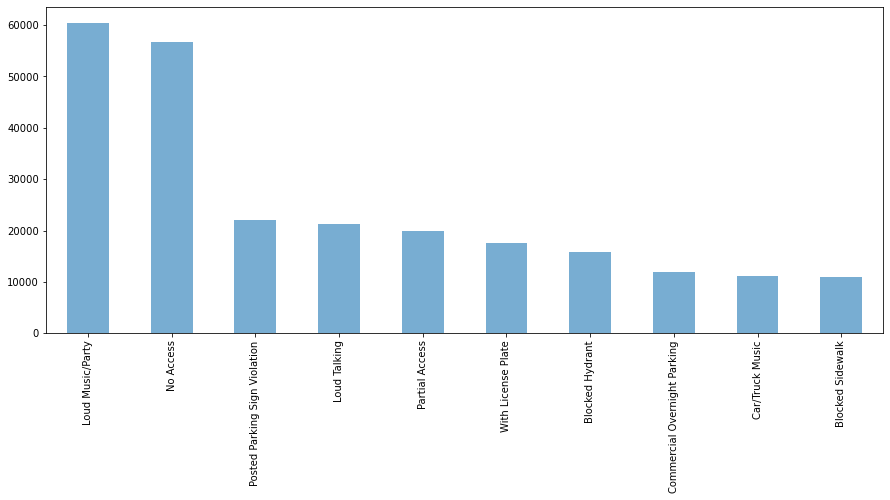

In [19]:
df['Descriptor'].value_counts()[:10].plot(kind='bar',alpha=0.6,figsize=(15,6))

- Lets now plot top 10 of the highest complaint types with respect to Boroughs.

In [20]:
top10_complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Noise - Vehicle','Animal Abuse','Traffic','Vending','Noise - Park',]
comp_borough = df.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top10_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic,Vending,Noise - Park
Borough,,,,,,,,,,
BRONX,12741,7831,2431,8864,1949,3385,1413,356,377,522
BROOKLYN,28128,27394,11452,13316,5167,5146,2390,1082,514,1537
MANHATTAN,2057,11983,14540,20383,530,5375,1511,1534,2380,1167
QUEENS,31630,21951,6058,4392,8102,2608,1874,1303,477,634
STATEN ISLAND,2141,4883,678,816,1763,356,557,196,25,67


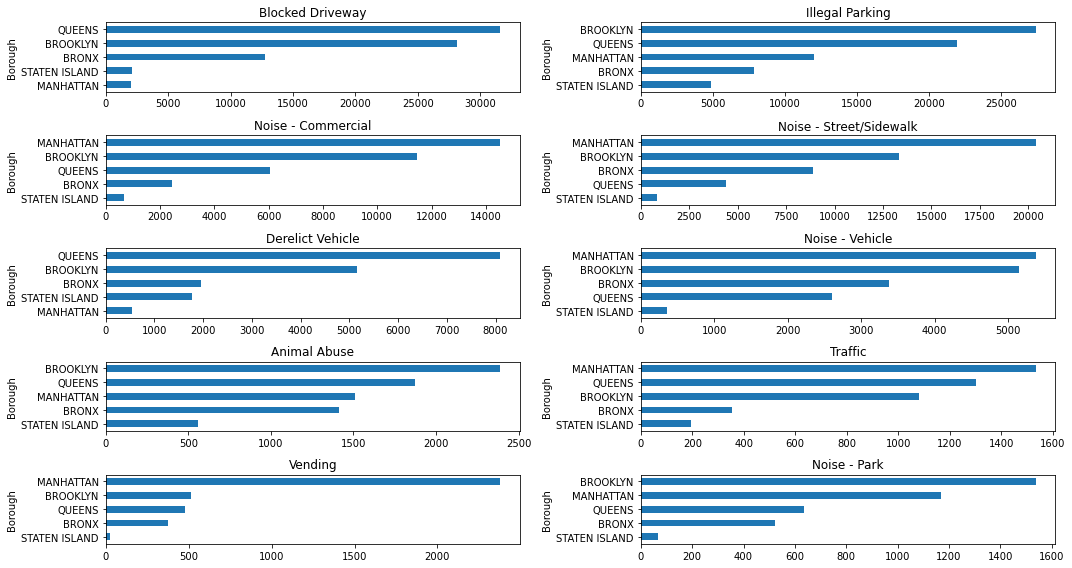

In [21]:
col_number = 2
row_number =5 
fig, axes = plt.subplots(row_number,col_number, figsize=(15,8))

for i, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clearly Manhattan is making most of the noise, followed by Brooklyn.
- Brooklyn has the most number of 'Illegal parking' complaints and is also on the top for 'Animal Abuse'. (Savages!)
- Queens has highest complaints for 'Blocked Driveway' as well as for 'Derelict Vehicle'.
- Lets now breakdown the complaints for each Borough

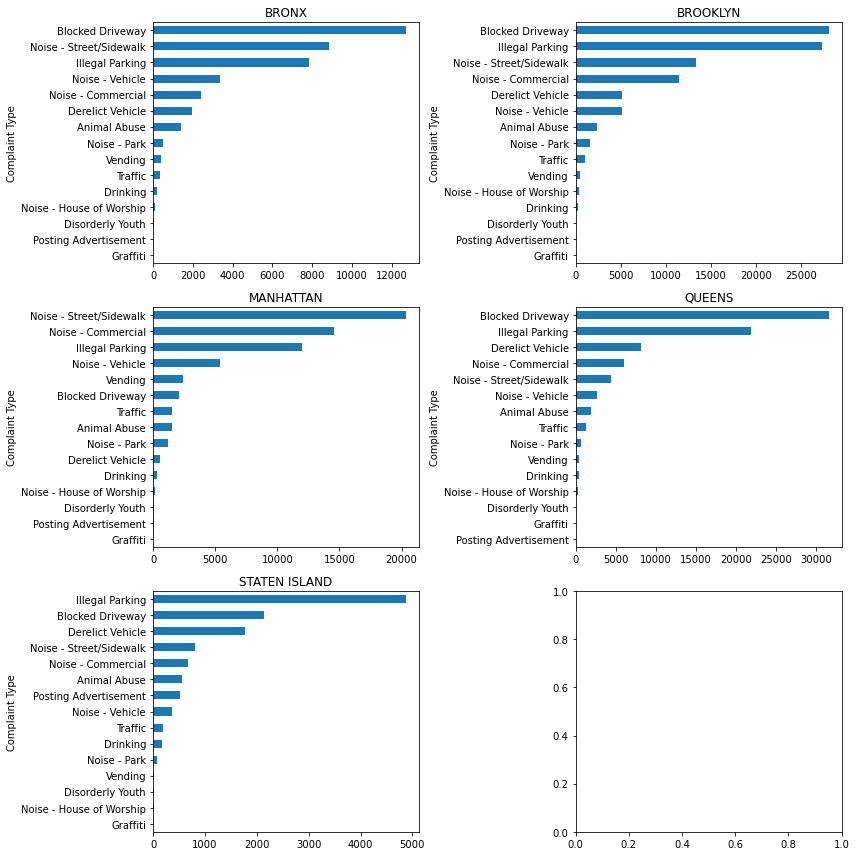

In [22]:
# Visualization of most Complaints per Borough
borough_comp = df.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Apart from Manhattan, number of Complaints for 'Blocked Driveway' and 'Illegal Parking' is highest for each Borough.
- Manhattan has highest number of Noise complaints. Fortunaltely, parking in Manhattan is better than other Boroughs

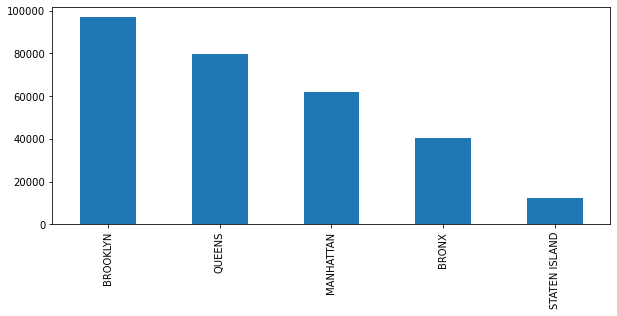

In [23]:
df['Borough'].value_counts().plot(kind='bar',figsize=(10,4))


- Borough wise, Brooklyn has the most number of Complaints followed by Queens and Manhattan

In [24]:
#See the top 10 cities for highest number of complaints.
df['City'].value_counts()[:10]

BROOKLYN         96881
NEW YORK         61940
BRONX            40223
STATEN ISLAND    12214
JAMAICA           7155
ASTORIA           6254
FLUSHING          5919
RIDGEWOOD         5124
CORONA            4266
WOODSIDE          3494
Name: City, dtype: int64

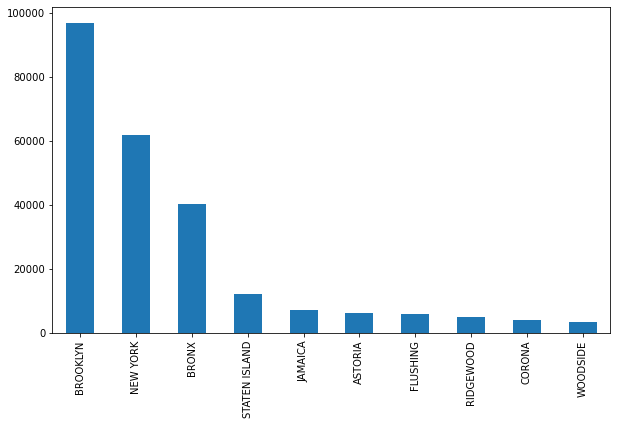

In [25]:
df['City'].value_counts()[:10].plot(kind='bar',figsize=(10,6))

- Clearly shown Broiklyn has highest number of complaint 
- Second highest New York then Bronx

In [26]:
df['Agency'].value_counts()

NYPD    291204
Name: Agency, dtype: int64

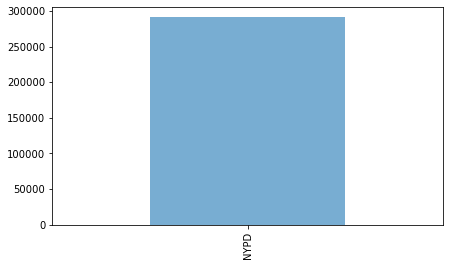

In [27]:
df['Agency'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,4))

In [28]:
df['Request_Closing_Time'].describe()

count                    291204
mean     0 days 04:18:30.611983
std      0 days 06:03:42.643823
min             0 days 00:01:00
25%             0 days 01:16:30
50%             0 days 02:42:38
75%             0 days 05:20:23
max            24 days 16:52:22
Name: Request_Closing_Time, dtype: object

- convert our Request_Closing_Time from days to number of hours.
- converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then find out the mean and standard distribution of the data.    

In [29]:
df['Request_Closing_Hours'] = df['Request_Closing_Time'].astype('timedelta64[h]')+1
df[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,00:55:15,1.0
1,01:26:16,2.0
2,04:51:31,5.0
3,07:45:14,8.0
4,03:27:02,4.0


In [30]:
mean = df['Request_Closing_Hours'].mean()
std = df['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.818282029093007
Std:  6.0636246344163185


In [31]:
df['Request_Closing_Hours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

- closing times are too high and hence will be dealt as outliers.
- convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
- z-statistic = (value-mean)/std
- Next will plot the histogram of our Request_Closing_Time.


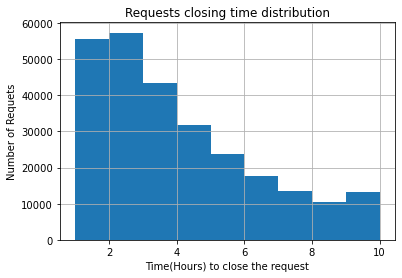

In [32]:
plot_data = df[ ((df['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

- Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.
- Around 99% of the complaints were closed within 10 hours.
- Lets look at the closing complaint performance Boroughwise

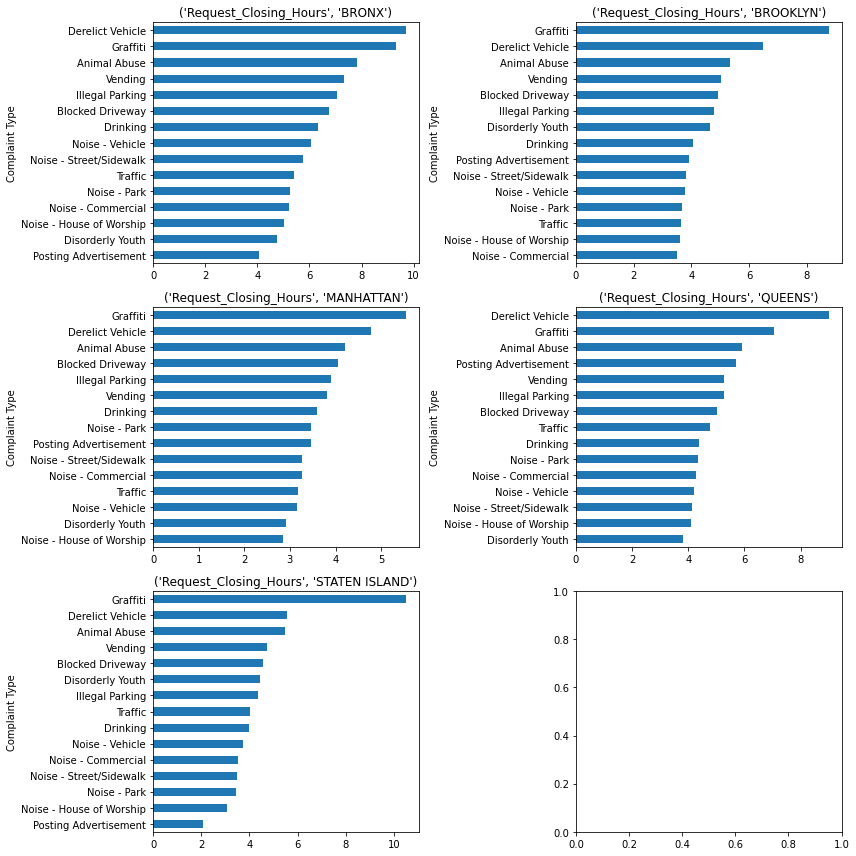

In [33]:
citywise_resolution = df.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clealry 'Graffiti' complaints are taking a long time to be closed. Could be because the number of Graffiti complaints are very less and officials are focused on more pressing issues.
- Manhattan, Bronx and Queens are handling 'Disorderly Youth' complaints very well.
- Brooklyn is performing well to close Noise and traffic complaints.
- Lets now do a month wise analysis of complaints.

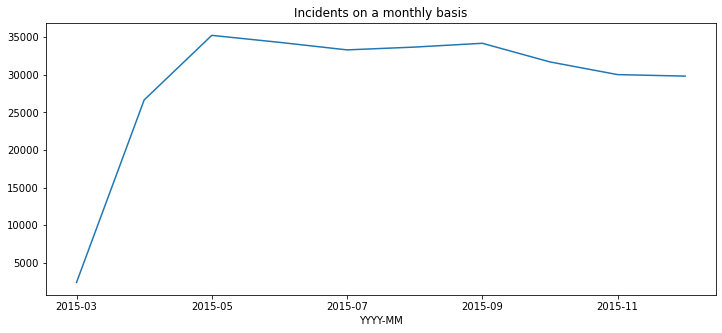

In [34]:
import datetime
df['YYYY-MM'] = df['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  df.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');


- January and Februray have the least number of complaints.
- May and September has the highest number of complaints. 

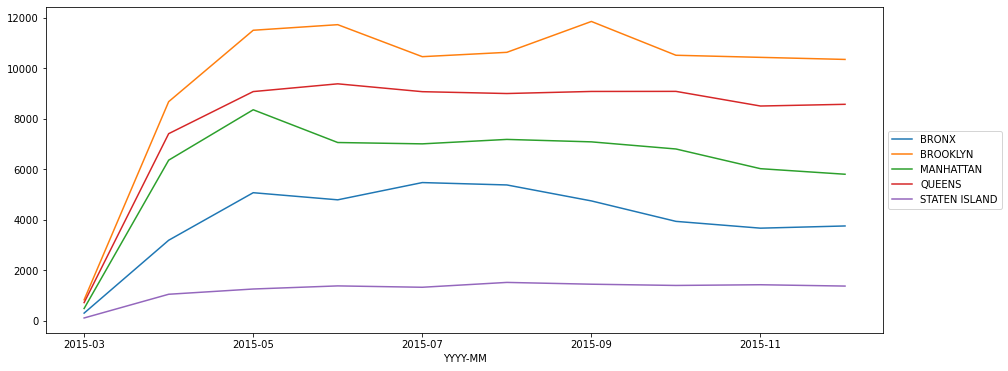

In [35]:
# Complaints per Borough through the year
df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- Brooklyn raise highest number of complaints in May and September and least comlaints in February.
- As for the Request Closing time

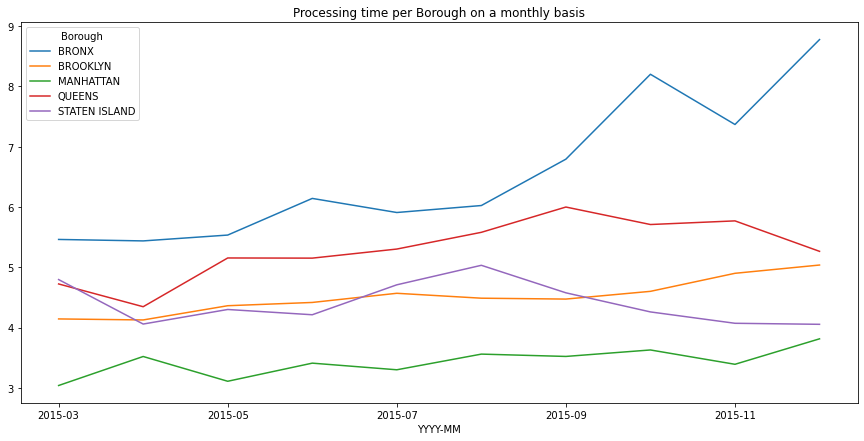

In [36]:
df.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis')

- Manhattan has the best average closing time throughout the year.
- Shockingly Bronx has the highest closing time. It also has the leasts number of complaints after Staten island.
- Staten island's closing time is better than Bronx.


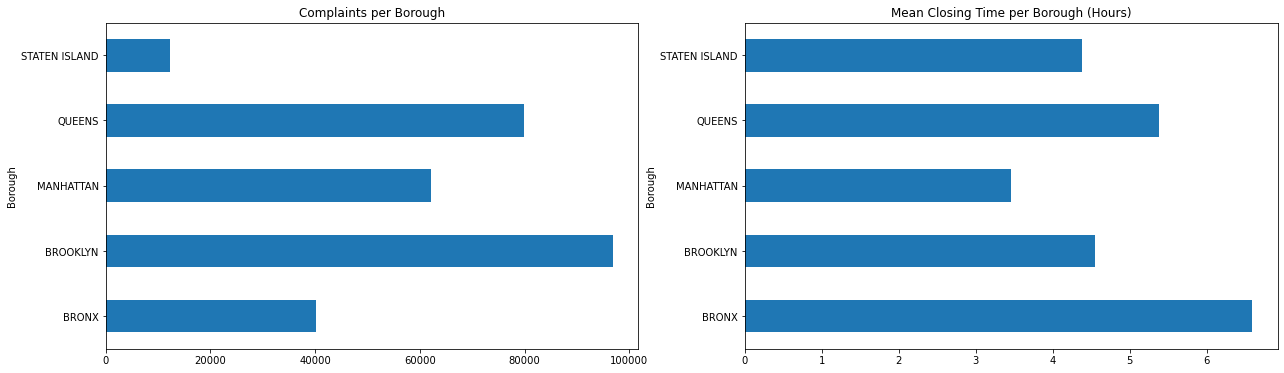

In [37]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
df.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
df.groupby('Borough')['Request_Closing_Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

## Brooklyn:
- Raises the most number of complaints as of 33%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Brooklyn)
- Around 30% of 'Animal Abuse' complaints are raised from Brooklyn alone.
- Complaints are closed in second best average closing time. (4.5 hours per complaint)

## Queens:
- Number of complaints are second highest at around 28%.
- As Brooklyn, Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (68% of all complaints raised in Queens)
- 40% of all 'Blocked Driveway' complaints are raised from Queens.
- 45% of all 'Derelict Vehicle' complaints are raised from Queens.
- Complaints are closed poorly, in average closing time of 5 hours.

## Manhattan:
- Number of complaints are around 20%.
- Mostly Noise related complaints. (55% including both streetwalk and commercial complaints)
- Complaints are closed in best closing time. (3.5 hours per complaint)


## Bronx:
- Number of Complaints around 13%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (55% of all complaints raised in Bronx)
- Complaints are closed in poorest closing time. (more than 6 hours per complaint)

## Staten Island:
- Lowest number of Complaints raised.(4%)
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Staten Island)
- Complaints are closed in average closing time.(4.5 hours per complaint)

In [225]:
# Hypothesis testing

### 1. Whether the average response time across complaint types is similar or not (overall)
- First we will convert our hourly timedelta into minuted for more precise results.
- Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.
- We see a positive skewness in data if we limit the range to 1250
- As our data contains too many outliers , hence we will transform the data using log transformation

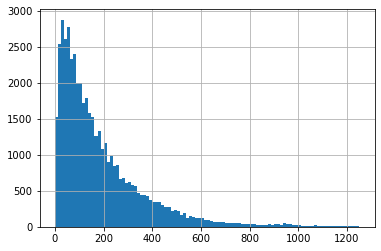

In [38]:
df['Request_Closing_Minutes'] = df['Request_Closing_Time'].astype('timedelta64[m]')+1

original_df = df[df['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
original_df.hist(bins=100,range=(0,1250))

In [39]:
original_df.describe()

count    47771.000000
mean       207.218647
std        327.125227
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

- Look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.
- Take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.
- Log transformation removes the skewness from the data.

In [40]:
data = {}
for complaint in df['Complaint Type'].unique():
    data[complaint] = np.log(df[df['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [41]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

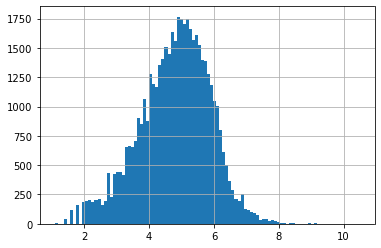

In [42]:
data['Noise - Street/Sidewalk'].hist(bins=100)

- Above distribution plot shows that once we apply log Transformation to our data, skewness is almost removed and it looks more like a normal distribution.

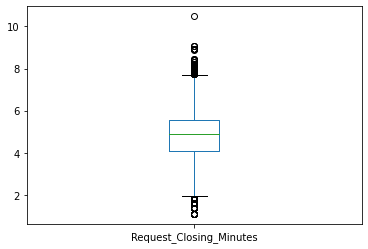

In [43]:
data['Noise - Street/Sidewalk'].plot(kind='box')

In [44]:
for complaint in data.keys():
    print(data[complaint].std())

1.08857871758125
0.9689454127715484
1.067148044062659
1.247250640294688
1.07412369121819
1.1589202042209954
1.1947703475310807
1.0641925812925177
1.0360355296426127
1.0995431178584425
1.1704229458117386
1.0358383203301404
1.1061328713039125
1.0581967861803852
1.026822302225286


- To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.
- Below conditions should be met before conducting ANOVA.
- All distributions must follow a normal distributions curve. We have verified this after the log transformation
- Standard deviation for all groups must be same. Above output proves that this is true.
- All samples are drawn independently of each other.

In [45]:
[ complaint for complaint in data.keys() ]


['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

- Now we will futher move on to defining hypothesis and critical values........


- Null Hypothesis: Average response time for all the complaints type is same.


- Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

- Below We conduct ANOVA test for top 5 type of complaints
- For a 95% of confidence interval we choose our alpha as 0.05 for 5%
- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.


- if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

- if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [46]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2457.035, p=0.000
Different distributions (reject H0)


- As our p-value is quite low , hence it is being converted to 0.0
- Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

###### Average response time for all the complaints type is not same.

### 2. Are the type of complaint or service requested and location related?
- To find the correlation between location and complaint types, we will consider below columns
- Complaint Type
- Borough
- City
- Longitude
- Latitude

In [47]:
df1 = df[['Complaint Type','Borough','Longitude','Latitude','City']]

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Complaint Type  291204 non-null  object 
 1   Borough         291204 non-null  object 
 2   Longitude       291204 non-null  float64
 3   Latitude        291204 non-null  float64
 4   City            291164 non-null  object 
dtypes: float64(2), object(3)
memory usage: 13.3+ MB


In [60]:
df1['Complaint Type'] = df1['Complaint Type'].cat.codes
df1['Borough'] = df1['Borough'].cat.codes
df1['City'] = df1['City'].cat.codes

In [61]:
df1.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,10,2,-73.923501,40.865682,33
1,1,3,-73.915094,40.775945,1
2,1,0,-73.888525,40.870325,6
3,6,0,-73.828379,40.835994,6
4,6,3,-73.874170,40.733060,13


In [62]:
df1.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.076783,-0.181838,0.170170,0.094312
Borough,-0.076783,1.000000,0.022102,-0.250846,0.718654
Longitude,-0.181838,0.022102,1.000000,0.368839,-0.118906
Latitude,0.170170,-0.250846,0.368839,1.000000,-0.004001
City,0.094312,0.718654,-0.118906,-0.004001,1.000000


- See from above table, **there is no relationship between complaint type and location**.
- Which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.